## Name : Omkar Thawakar
Reg No : 2015BCS003 , Roll No : A-08
#### Aim : Implement R- Category Descrete Perceptron clasifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

class RDPTA:
    def __init__(self,neurons,eta=1):
        self.neurons=neurons
        self.eta=eta
        
    def init_weights(self,X,weights):
    	self.weights = np.array(weights)
    	'''if weights:
    	    self.weights = np.array(weights)
    	else:
    	    self.weights =  np.random.random((1+np.array(X).shape[1],self.neurons))
    	'''
    def aug_inputs(self,X):
        for x in X:
            x.append(1)
        return X

    
    def train(self,X,outputs,epochs):
        self.weights =self.weights
        print("Initial Weights : ",self.weights)
        X = self.aug_inputs(X)
        print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 0
        for i in range(epochs):
            print("Epoch : ",epoch)
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x)
                #print("D : ",d)
                print("For input pattern : ",x)
                print("Output of network : ",out)
                err += 0.5*(d-out)**2
                delta_=[]
                for d_,o_ in zip(d,out):
                    delta_.append(0.5*self.eta*(d_-o_))
                #print("Delta : ",delta_)
                del_w = []
                for del_ in delta_:
                    del_w.append(np.multiply(del_,x))
                #print("Delta_W is : ",del_w)
                for i in range(len(self.weights)):
                    self.weights[i] = self.weights[i]+del_w[i]    
                #self.weights = self.weights+ 0.5*self.eta*(d-out)*x
                print("Weights : ",self.weights)
                p+=1
                self.error_.append(err)
            print("Error : ",err)
        print("Training Steps Required are {} .".format(p))
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X):
        return np.dot(self.weights,X)
    
    def predict(self,x):
        print("Net : ",self.net_input(np.array(x)))
        return np.where(self.net_input(np.array(x))>0,1,-1)

In [2]:
X = [[0.8,0.5,0],[0,0.2,0.3],[0.9,0.7,0.3],[0.2,0.1,1.3],[1,0.8,0.5],[0.2,0.7,0.8]]
d = [[-1],[1],[-1],[1],[-1],[1]]
weights = [[0,0,0],[0,0,0],[0,0,0]]

neurons = RDPTA(1)
neurons.init_weights(X,weights)
print("Initial Weights of Neuron are : ",neurons.weights)
neurons.train(X,d,4)

Initial Weights of Neuron are :  [[0 0 0]
 [0 0 0]
 [0 0 0]]
Initial Weights :  [[0 0 0]
 [0 0 0]
 [0 0 0]]
Augmented input pattern :  [[0.8, 0.5, 0, -1], [0, 0.2, 0.3, -1], [0.9, 0.7, 0.3, -1], [0.2, 0.1, 1.3, -1], [1, 0.8, 0.5, -1], [0.2, 0.7, 0.8, -1]]
Epoch :  1


ValueError: shapes (3,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [114]:
print("Final Weights of Neuron are : ")
neurons.weights

Final Weights of Neuron are : 


array([[ 5,  3,  5],
       [ 0, -1,  2],
       [-9,  1,  0]])

### Visualization of Decision Boundaries

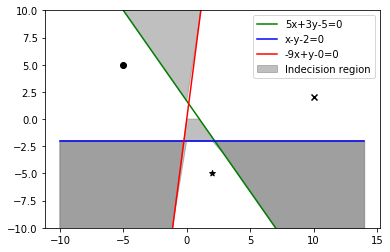

In [115]:
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='k' ,marker='x' if j==[1,-1,-1]  else '*' if j==[-1,1,-1] else 'o')

    
x = np.arange(-10,15)
a1,b1,c1 = neurons.weights[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='5x+3y-5=0')

a2,b2,c2 = neurons.weights[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='x-y-2=0')

a3,b3,c3 = neurons.weights[2]
y3 = (c3-a3*x)/b3
plt.plot(x,y3,c='r',label='-9x+y-0=0')

#fill Indecision regions
y4 = np.maximum(y1, y3)
plt.fill_between(x,y4,150,color='grey',alpha=0.5,label='Indecision region')
y5 = np.minimum(y1, y2)
plt.fill_between(x,y5,y2,color='grey',alpha=0.5)
y6 = np.minimum(y2, y3)
plt.fill_between(x,y6,y2,color='grey',alpha=0.5)
y7 = np.minimum(y1,y3)
y8 = np.minimum(1.5,y2)
plt.fill_between(x,y2,y7,color='grey',alpha=0.5)



plt.ylim([-10,10])
plt.legend()
plt.show()

In [5]:
import numpy as np

class DiscretePerceptron:

	def __init__(self, x_input, y_input, activation=None):
		'''
		x_input = data points
		y_input = target labels
		'''
		if len(x_input) != len(y_input):
			raise ValueError('X and Y must have length.')

		self.n_dims = x_input.shape[-1]

		self.aug_x = self.augment_input(x_input)

		self.y_input = y_input
		if activation is None:
			self.__activation = self.__threshold

	def init_params(self):
		self.P = len(self.aug_x)
		self.error = 0
		self.p = 1
		self.k = 1
		self.c = 1 # learning rate
		self.W = np.random.random((self.aug_x.shape[-1]))

	def augment_input(self, x_input):
		_input = []
		for i in x_input:
			_input.append(np.concatenate((i, [1])))
		return np.array(_input)

	def set_weights(self, W):
		self.W = np.array(W)

	def __threshold(self, net):
		if net >= 0:
			return 1
		else:
			return -1

	def train(self, interactive=False):
		stop = False
		while not stop:
			if interactive:
				print('Training Cycle #{}:'.format(self.k))
			self.E = 0
			for step in range(self.P):
				if interactive:
					print('Step #{}:'.format(self.p))
					print('%20s : %s' % ('W (before adjust)', (self.W)))
					print('%20s : %s' % ('Input', (self.aug_x[step])))
				net = np.dot(self.W.T, self.aug_x[step])
				if net == 0:
					# if self.y_input[step] == -1:
					# 	output = 1
					# elif self.y_input[step] == 1:
					# 	output = -1
					output = 0
				else:
					output = self.__activation(net)

				_delta = self.c * 0.5 * (self.y_input[step] - output) * self.aug_x[step]
				self.W = self.W + (_delta)
				self.E = self.E + 0.5 * (self.y_input[step] - output) ** 2
				if interactive:
					print('%20s : %s' % ('Outputs (d, O)', (self.y_input[step], output)))
					print('%20s : %s' % ('Error', self.E))
					print('%20s : %s' % ('W (after adjust)', self.W))
				self.p += 1

			if self.E == 0:
				stop = True
			self.k += 1
			if interactive:
				input()

		print('Training steps required: {}'.format(self.p))

if __name__=='__main__':
	# Testing for AND

	X = [[0.8,0.5,0],[0,0.2,0.3],[0.9,0.7,0.3],[0.2,0.1,1.3],[1,0.8,0.5],[0.2,0.7,0.8]]
	d = [-1,1,-1,1,-1,1]
	weights = [[0,0,0],[0,0,0],[0,0,0]]

	x = np.array(X)
	y = np.array(d)
	s = DiscretePerceptron(x, y)
	s.init_params()
	s.set_weights(weights)
	s.train()







ValueError: shapes (3,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)